In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import datetime, warnings, scipy

In [37]:
df = pd.read_csv('flights.csv')

In [38]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [39]:
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [40]:
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_heure)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_heure)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_heure)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [41]:
airlines_names = pd.read_csv('airlines.csv')
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
#Clean data to use only columns that I will use.
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df.drop(variables_to_remove, axis = 1, inplace = True)
df = df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


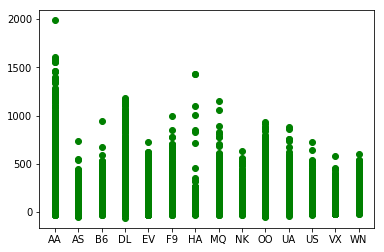

In [10]:
plt.scatter(x=df['AIRLINE'], y=df['DEPARTURE_DELAY'], color='green')
plt.show()

In [42]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
AIRLINE,,,,
VX,10133.0,577.0,10.297641,-20.0
HA,14105.0,1433.0,1.549380,-26.0
F9,14450.0,996.0,23.179170,-32.0
NK,19164.0,634.0,16.076289,-28.0
AS,29428.0,735.0,2.902882,-47.0
B6,45541.0,942.0,15.913243,-27.0
MQ,57999.0,1154.0,18.151813,-29.0
US,70885.0,726.0,7.565493,-26.0
UA,85270.0,886.0,15.114108,-40.0


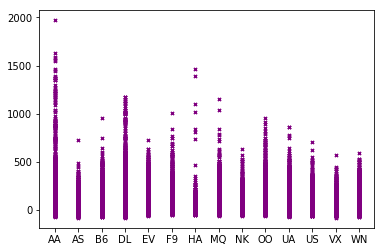

In [11]:
plt.scatter(
    x=df['AIRLINE'],
    y=df['ARRIVAL_DELAY'],
    color='purple',
    marker='x', s=10
)
plt.show()

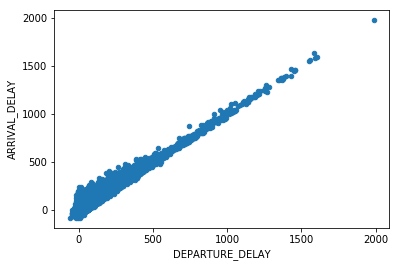

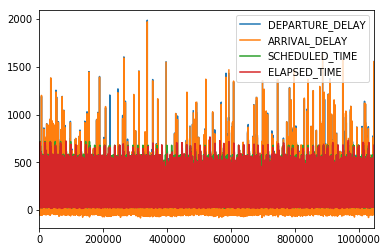

In [27]:
df.plot(kind='scatter', x='DEPARTURE_DELAY',y= 'ARRIVAL_DELAY')
df.plot(kind='line')
plt.show()

In [43]:
df.groupby('AIRLINE').describe()

AIRLINE_DELAY                                                     \
                count       mean        std  min  25%  50%   75%     max   
AIRLINE                                                                    
AA            21230.0  21.865332  71.359924  0.0  0.0  2.0  22.0  1971.0   
AS             4153.0  15.425476  38.258480  0.0  0.0  0.0  15.0   431.0   
B6            13789.0  17.911741  36.941047  0.0  0.0  6.0  18.0   942.0   
DL            24672.0  22.168004  61.036777  0.0  0.0  3.0  20.0  1174.0   
EV            26118.0  20.536450  45.675244  0.0  0.0  1.0  20.0   723.0   
F9             5428.0  15.769713  45.363365  0.0  0.0  1.0  14.0   996.0   
HA             2103.0  20.112696  68.008948  0.0  3.0  9.0  20.0  1467.0   
MQ            21311.0  15.506124  39.609529  0.0  0.0  0.0  16.0   811.0   
NK             5902.0  12.993731  33.776268  0.0  0.0  0.0  12.0   631.0   
OO            24342.0  17.787446  48.472674  0.0  0.0  0.0  15.0   916.0   
UA            20323.0  19.982434  37.916974  0.0  0.0  9.0  23.0   573.0   
US            15026.0  17.764874  35.794864  0.0  0.0  3.0  20.0   516.0   
VX             1936.0  12.397727  33.716831  0.0  0.0  0.0  11.0   448.0   
WN            42195.0  15.082877  30.913225  0.0  0.0  5.0  17.0   593.0   

        AIR_SYSTEM_DELAY              ...   WHEELS_ON              YEAR  \
                   count       mean   ...         75%     max     count   
AIRLINE                               ...                                 
AA               21230.0  12.530193   ...      1940.0  2400.0   97549.0   
AS                4153.0  12.802312   ...      2003.0  2400.0   29614.0   
B6               13789.0  16.690550   ...      1938.0  2400.0   48157.0   
DL               24672.0  14.650130   ...      1915.0  2400.0  147486.0   
EV               26118.0  14.358565   ...      1832.0  2400.0  111206.0   
F9                5428.0  25.168018   ...      1950.0  2400.0   14669.0   
HA                2103.0   1.198288   ...      1848.0  2400.0   14133.0   
MQ               21311.0  16.054995   ...      1835.0  2400.0   65513.0   
NK                5902.0  30.690952   ...      1945.0  2400.0   19612.0   
OO               24342.0  12.317024   ...      1842.0  2400.0  107099.0   
UA               20323.0  14.006643   ...      1922.0  2359.0   87606.0   
US               15026.0  16.092972   ...      1918.0  2400.0   73942.0   
VX                1936.0  23.356921   ...      1946.0  2400.0   10403.0   
WN               42195.0   7.332836   ...      1917.0  2400.0  221586.0   

                                                              
           mean  std     min     25%     50%     75%     max  
AIRLINE                                                       
AA       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
AS       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
B6       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
DL       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
EV       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
F9       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
HA       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
MQ       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
NK       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
OO       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
UA       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
US       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
VX       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
WN       2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0  

[14 rows x 176 columns]

In [46]:
df.groupby('ORIGIN_AIRPORT').describe()

AIRLINE_DELAY                                                  \
                       count        mean         std  min  25%   50%     75%   
ORIGIN_AIRPORT                                                                 
ABE                    104.0   20.182692   63.798798  0.0  0.0   0.0   12.25   
ABI                    116.0   20.172414   49.696693  0.0  0.0   0.0   19.25   
ABQ                    684.0   18.742690   63.849644  0.0  0.0   1.0   10.00   
ABR                     25.0   96.160000  238.255409  0.0  0.0   0.0    5.00   
ABY                     38.0   25.210526   67.175912  0.0  0.0   0.5    9.75   
ACT                     67.0   19.029851   74.188942  0.0  0.0   0.0    0.00   
ACV                     92.0   11.380435   47.345316  0.0  0.0   0.0    0.00   
ACY                    156.0    8.608974   25.777603  0.0  0.0   0.0    5.00   
ADK                      5.0    0.000000    0.000000  0.0  0.0   0.0    0.00   
ADQ                      3.0   37.333333   64.663230  0.0  0.0   0.0   56.00   
AEX                    128.0   20.804688   64.297177  0.0  0.0   0.0    5.25   
AGS                    116.0   19.474138   65.410604  0.0  0.0   0.0    8.00   
ALB                    237.0   22.801688   58.663204  0.0  0.0   4.0   16.00   
ALO                     40.0   16.850000   59.502876  0.0  0.0   0.0    4.50   
AMA                    263.0   14.148289   47.191554  0.0  0.0   0.0    5.00   
ANC                    271.0   23.162362   42.514610  0.0  0.0   4.0   27.00   
APN                     26.0   12.500000   39.829888  0.0  0.0   0.0    0.00   
ASE                    435.0   12.501149   38.195373  0.0  0.0   0.0    6.00   
ATL                  11549.0   21.765521   40.580921  0.0  0.0   9.0   26.00   
ATW                    129.0    9.767442   22.871418  0.0  0.0   0.0   10.00   
AUS                   1360.0   15.689706   59.157197  0.0  0.0   0.0   10.00   
AVL                     81.0   18.654321   49.830001  0.0  0.0   0.0   13.00   
AVP                     66.0   13.924242   41.403571  0.0  0.0   0.0    7.75   
AZO                    104.0   20.442308   68.425826  0.0  0.0   0.0    0.00   
BDL                    788.0   16.758883   39.014841  0.0  0.0   4.0   15.00   
BET                     25.0    8.560000   37.654216  0.0  0.0   0.0    0.00   
BFL                     81.0   35.382716   88.715355  0.0  0.0   0.0   13.00   
BGM                     13.0   21.769231   40.581510  0.0  0.0   8.0   19.00   
BGR                      6.0   80.166667  116.655761  0.0  0.0  25.5  117.00   
BHM                    482.0   22.655602  103.925937  0.0  0.0   0.0   10.00   
...                      ...         ...         ...  ...  ...   ...     ...   
SPS                     64.0   22.718750   67.059904  0.0  0.0   0.0    7.00   
SRQ                    145.0   18.751724   90.352822  0.0  0.0   2.0    7.00   
STC                     24.0    6.666667   18.289143  0.0  0.0   0.0    0.00   
STL                   1777.0   14.130557   48.118283  0.0  0.0   2.0   15.00   
STT                    247.0   16.295547   45.945329  0.0  0.0   2.0   15.00   
STX                     48.0   29.187500   58.030314  0.0  0.0   4.0   22.50   
SUN                     31.0    1.258065    4.032929  0.0  0.0   0.0    0.00   
SUX                     44.0   12.568182   28.341274  0.0  0.0   0.0    8.00   
SWF                     35.0   41.457143   69.682618  0.0  0.0   9.0   48.50   
SYR                    275.0   16.996364   52.732454  0.0  0.0   0.0    6.00   
TLH                    128.0   21.218750   60.737455  0.0  0.0   0.0    7.00   
TOL                     58.0    4.448276   21.173612  0.0  0.0   0.0    0.00   
TPA                   2457.0   14.812780   36.353258  0.0  0.0   4.0   14.00   
TRI                     65.0   20.138462   48.633475  0.0  0.0   3.0   17.00   
TTN                    210.0   27.638095   51.270205  0.0  0.0   6.0   25.75   
TUL                    550.0   10.763636   36.822651  0.0  0.0   0.0    6.00   
TUS            

In [49]:
airlines_names = pd.read_csv('airlines.csv')

In [50]:
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [51]:
airport_names = pd.read_csv('airports.csv')

In [52]:
airport_names

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


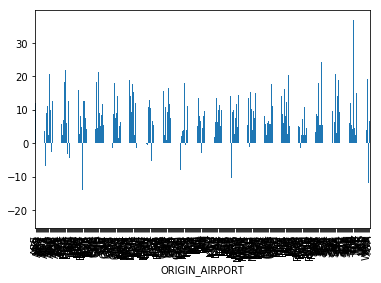

In [53]:
Airport_flights = df.groupby('ORIGIN_AIRPORT') ['ARRIVAL_DELAY'].mean()
Airport_flights.plot(kind = 'bar')

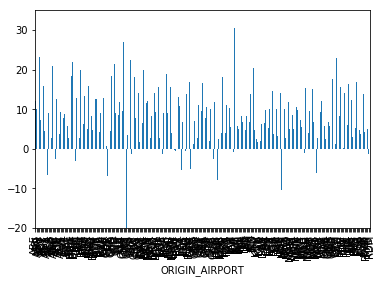

In [64]:
Airport_flights = df.groupby('ORIGIN_AIRPORT') ['ARRIVAL_DELAY'].mean()
Airport_flights.plot(kind = 'bar')
plt.ylim(-20,35, 1000)
plt.xlim(0,250, 9000)
plt.figure(figsize=(100,1000))